In [2]:
import nltk
from nltk.tokenize import sent_tokenize
import numpy as np
import pandas as pd  

In [3]:
sachin_text = open("sachin_farewell.txt")
first_text = sachin_text.read()
#print(first_text)

In [4]:
sangakkara_text = open("sangakkara_farewell.txt")
second_text = sangakkara_text.read()
#print(second_text)

# Basic Emotion classes with synonyms list

In [5]:
from nltk.corpus import wordnet
import pandas as pd 

catval = ["happy","thanking","respect","care"]

synonyms1 = []
synonyms2 = []
synonyms3 = []
synonyms4 = []
#synonyms5 = []
synonyms = []

j=0
for words in catval:
    for syno in wordnet.synsets(words):
        for syn in syno.lemmas():
            
            if j == 0:
                synonyms1.append(syn.name())
            if j == 1:
                synonyms2.append(syn.name())
            if j == 2:
                synonyms3.append(syn.name())
            if j == 3:
                synonyms4.append(syn.name())
            #if j == 4:
            #    synonyms5.append(syn.name())
           
    j = j + 1
synonyms.append(synonyms1)
synonyms.append(synonyms2)
synonyms.append(synonyms3)
synonyms.append(synonyms4)
#synonyms.append(synonyms5)
print(synonyms)   

[['happy', 'felicitous', 'happy', 'glad', 'happy', 'happy', 'well-chosen'], ['thank', 'give_thanks'], ['respect', 'regard', 'esteem', 'regard', 'respect', 'respect', 'esteem', 'regard', 'deference', 'respect', 'obedience', 'respect', 'regard', 'respect', 'deference', 'respect', 'respectfulness', 'respect', 'esteem', 'value', 'prize', 'prise', 'respect', 'honor', 'honour', 'abide_by', 'observe'], ['care', 'attention', 'aid', 'tending', 'caution', 'precaution', 'care', 'forethought', 'concern', 'care', 'fear', 'care', 'care', 'charge', 'tutelage', 'guardianship', 'care', 'maintenance', 'upkeep', 'care', 'care', 'give_care', 'wish', 'care', 'like', 'manage', 'deal', 'care', 'handle', 'worry', 'care']]


In [3]:
print(len(synonyms))

4


# Generating Dataframe with each sentences as row value, emotion, noun,verb ,word count

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

import language_tool_python
tool = language_tool_python.LanguageTool('en-US')


firstl = len(sent_tokenize(first_text))
secondl = len(sent_tokenize(second_text))
#thirdl = len(sent_tokenize(third_text))

emo_list = sent_tokenize(first_text)
emo_list2 = sent_tokenize(second_text)
#emo_list3 = sent_tokenize(third_text)

########## Calculate emotion / verb ,noun

def calculate_emotion(emlist):
    count_list = []
    emotion_list = []    
    verb_list=[]
    noun_list=[]
    
    grammer_list=[]
    
    ########## Grammer checking list 
    
    for sent in emlist: 
        
        text = sent
        matches = tool.check(text)        
        grammer_list.append(len(matches))        
       
    
    ############ Noun and Verb count calculating
    
    for sent in emlist:  
        flag_noun = 0
        flag_verb = 0
        sent_tokens = word_tokenize(sent)
        verblist=[]
        nounlist=[]
        
        for token in sent_tokens:
            #print(token)
            
            tk = nltk.pos_tag([token])
            if tk[0][1] == 'NN':
                flag_noun = 1                
                nounlist.extend([tk[0][0]])
            if tk[0][1] == 'VBD':
                flag_verb = 1
                verblist.extend([tk[0][0]])
        if flag_noun ==  0:
            noun_list.append(nounlist)
        else:
            noun_list.append(nounlist)
        
        if flag_verb ==  0:
            verb_list.append(verblist)
        else:
            verb_list.append(verblist) 
            
    ############## Emotional list creation
            
        
    for wordl in emlist:       
       
        wdd = wordl.split()  
        f = 1
        ival = 0
        for wd in wdd:
            wd1 = wd.replace(r")", "")
            wd2 = wd1.replace(r"(", "")
            wd3 = wd2.replace(r",", "")
            wd4 = wd3.replace(r".", "")
            wd4 = wd3.replace(r"[", "")
            wd4 = wd3.replace(r"]", "")
            
            for i in range(len(synonyms)):
                for j in range(len(synonyms[i])):
                    if synonyms[i][j].upper() == wd.upper():
                        f = 0
                        ival = i
                        break;
        if f == 1:
            emotion_list.append('none')  
        else:
            emotion_list.append(catval[ival]) 
                
        count_list.append(len(wdd))
        
        
    
        
    return count_list,emotion_list,noun_list,verb_list,grammer_list

##################  first text



[countv,vval,nounl,verbl,grammerl] = calculate_emotion(emo_list)
first_dict ={'emotion_text': emo_list, 'count' : countv, 'emotion':vval, 'nounl':nounl, 'verbl':verbl, 'grammerl':grammerl}
df_first = pd.DataFrame(first_dict)
train_first = df_first.iloc[:int(len(df_first)/2),:]
test_first = df_first.iloc[int(len(df_first)/2):,:]


train_happy_first = train_first[train_first.emotion == 'happy']
train_thanking_first = train_first[train_first.emotion == 'thanking']
train_respect_first = train_first[train_first.emotion == 'respect']
train_care_first = train_first[train_first.emotion == 'care']


test_happy_first = test_first[test_first.emotion == 'happy']
test_thanking_first = test_first[test_first.emotion == 'thanking']
test_respect_first = test_first[test_first.emotion == 'respect']
test_care_first = test_first[test_first.emotion == 'care']

#print(len(countv))
#print(len(vval))
#print(len(nounl))
#print(len(verbl))
#print(grammerl)


##################  second text

[countv,vval,nounl,verbl,grammerl] = calculate_emotion(emo_list2)
second_dict ={'emotion_text': emo_list2, 'count' : countv, 'emotion':vval, 'nounl':nounl, 'verbl':verbl, 'grammerl':grammerl  }
df_second = pd.DataFrame(second_dict)
train_second = df_second.iloc[:int(len(df_second)/2),:]
test_second = df_second.iloc[int(len(df_second)/2):,:]


train_happy_second = train_second[train_second.emotion == 'happy']
train_thanking_second = train_second[train_second.emotion == 'thanking']
train_respect_second = train_second[train_second.emotion == 'respect']
train_care_second = train_second[train_second.emotion == 'care']


test_happy_second = test_second[test_second.emotion == 'happy']
test_thanking_second = test_second[test_second.emotion == 'thanking']
test_respect_second = test_second[test_second.emotion == 'respect']
test_care_second = test_second[test_second.emotion == 'care']



#print(len(countv))
#print(len(vval))
#print(len(nounl))
#print(len(verbl))



# Emotion comparison

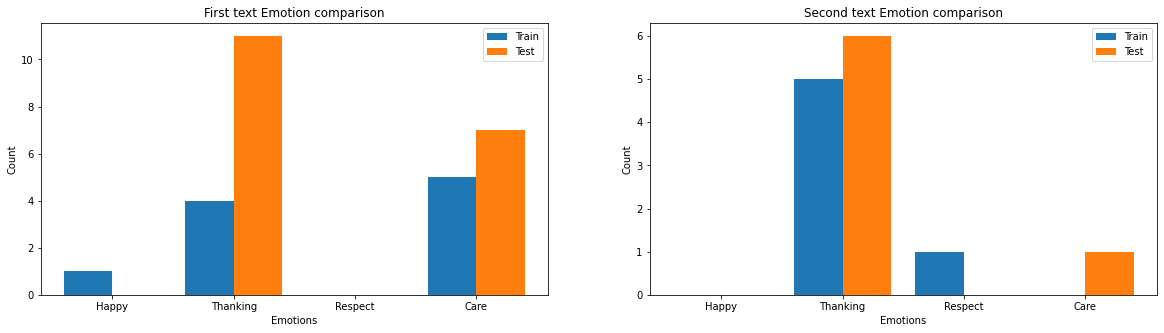

In [7]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


def calc_vval(listv):
    x = []
    for i in listv['count']:
        x.append(i)
    return x

def calc_countv(listv,emo):    
    total=0
    for j in listv['emotion']:        
        if catval[emo] == j:
            total = total + 1
    return total


X = ['Happy','Thanking','Respect','Care']
X_axis = np.arange(len(X))

plt.figure(figsize=(20,5))

  
plt.subplot(1,2,1)  

Ytrain_first = [calc_countv(train_happy_first,0),calc_countv(train_thanking_first,1),calc_countv(train_respect_first,2),calc_countv(train_care_first,3)]
Ztest_first = [calc_countv(test_happy_first,0),calc_countv(test_thanking_first,1),calc_countv(test_respect_first,2),calc_countv(test_care_first,3)]

plt.bar(X_axis - 0.2, Ytrain_first, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Ztest_first, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("First text Emotion comparison")
plt.legend()



plt.subplot(1,2,2)  

Ytrain_first = [calc_countv(train_happy_second,0),calc_countv(train_thanking_second,1),calc_countv(train_respect_second,2),calc_countv(train_care_second,3)]
Ztest_first = [calc_countv(test_happy_second,0),calc_countv(test_thanking_second,1),calc_countv(test_respect_second,2),calc_countv(test_care_second,3)]

plt.bar(X_axis - 0.2, Ytrain_first, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Ztest_first, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Second text Emotion comparison")
plt.legend()



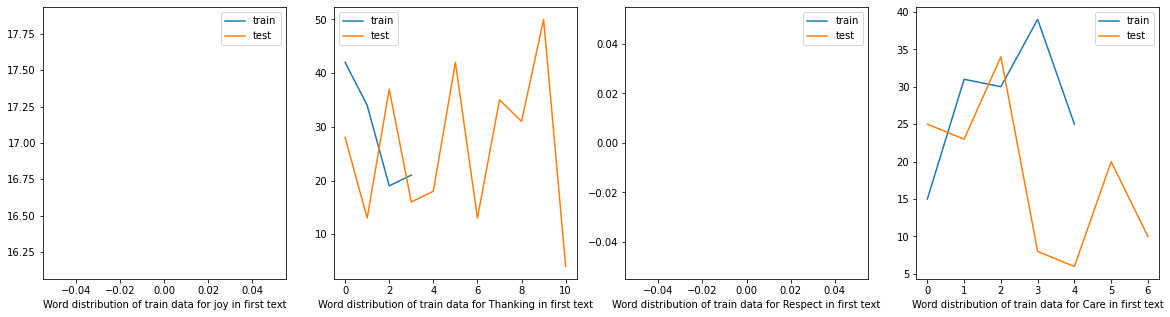

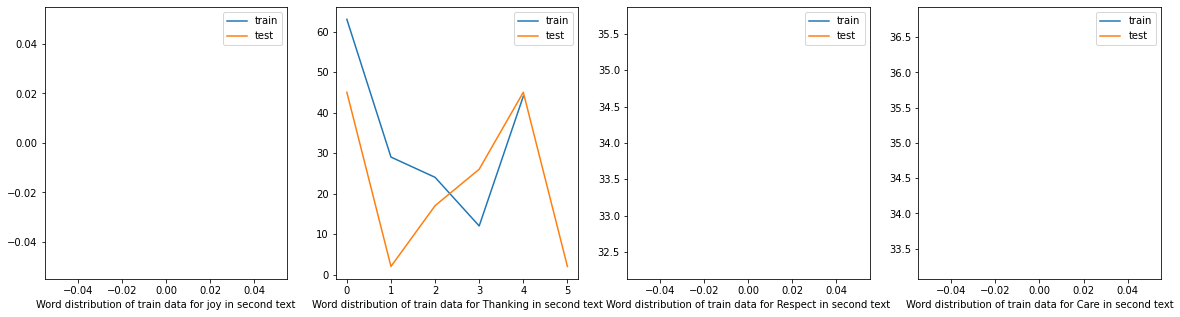

In [8]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

######### First text

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(calc_vval(train_happy_first),label = "train")
plt.plot(calc_vval(test_happy_first),label = "test")
plt.xlabel("Word distribution of train data for joy in first text")
plt.legend()

plt.subplot(1,4,2)
plt.plot(calc_vval(train_thanking_first),label = "train")
plt.plot(calc_vval(test_thanking_first),label = "test")
plt.xlabel("Word distribution of train data for Thanking in first text")
plt.legend()

plt.subplot(1,4,3)
plt.plot(calc_vval(train_respect_first),label = "train")
plt.plot(calc_vval(test_respect_first),label = "test")
plt.xlabel("Word distribution of train data for Respect in first text")
plt.legend()

plt.subplot(1,4,4)
plt.plot(calc_vval(train_care_first),label = "train")
plt.plot(calc_vval(test_care_first),label = "test")
plt.xlabel("Word distribution of train data for Care in first text")
plt.legend()

############ second text

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(calc_vval(train_happy_second),label = "train")
plt.plot(calc_vval(test_happy_second),label = "test")
plt.xlabel("Word distribution of train data for joy in second text")
plt.legend()

plt.subplot(1,4,2)
plt.plot(calc_vval(train_thanking_second),label = 'train')
plt.plot(calc_vval(test_thanking_second),label = 'test')
plt.xlabel("Word distribution of train data for Thanking in second text")
plt.legend()


plt.subplot(1,4,3)
plt.plot(calc_vval(train_respect_second),label = "train")
plt.plot(calc_vval(test_respect_second),label = "test")
plt.xlabel("Word distribution of train data for Respect in second text")
plt.legend()

plt.subplot(1,4,4)
plt.plot(calc_vval(train_care_second),label = "train")
plt.plot(calc_vval(test_care_second),label = "test")
plt.xlabel("Word distribution of train data for Care in second text")
plt.legend()



In [12]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def acc_claculate(df_one,df_two):
    le = preprocessing.LabelEncoder()
    y_train = le.fit_transform(df_one.emotion)
    y_test = le.fit_transform(df_two.emotion)

    X = df_one['count'].values.reshape(-1,1)
    X_test = df_two['count'].values.reshape(-1,1)

    clf = DecisionTreeClassifier(random_state = 5,max_depth=10,splitter='best')
    clf.fit(X,y_train)
    y_preds = clf.predict(X_test)

    acc_score = accuracy_score(y_test,y_preds)
    #print('Second text Decision Tree accuracy : ',acc_score)

    #####################################################33

    lr = LogisticRegression(C=0.3)

    lr.fit(X,y_train)
    y_preds = lr.predict(X_test)

    acc_lr_score = accuracy_score(y_test,y_preds)
    #print('Second text Logistic Regression accuracy : ',acc_score)
    return acc_score,acc_lr_score



[acc_score, acc_lr_score] = acc_claculate(train_first,test_first)
print('First text Decision Tree accuracy : ',acc_score)
print('First text Logistic Regression accuracy : ',acc_lr_score)


[acc_score, acc_lr_score] = acc_claculate(train_second,test_second)
print('Second text Decision Tree accuracy : ',acc_score)
print('Second text Logistic Regression accuracy : ',acc_lr_score)




First text Decision Tree accuracy :  0.13432835820895522
First text Logistic Regression accuracy :  0.16417910447761194
Second text Decision Tree accuracy :  0.2777777777777778
Second text Logistic Regression accuracy :  0.16666666666666666


# A noun or Verb phrase identification from text

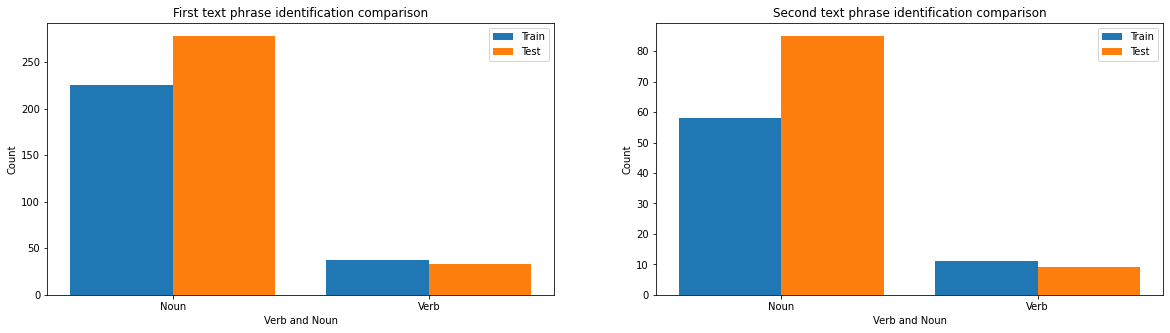

In [13]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data


def calc_nouncount(listv):   
    total = 0
    for i in listv['nounl']:
        total = total + len(i)        
    return total

def calc_verbcount(listv):   
    total = 0
    for i in listv['verbl']:
        total = total + len(i)        
    return total


X = ['Noun','Verb']
X_axis = np.arange(len(X))

plt.figure(figsize=(20,5))

  
plt.subplot(1,2,1)  

Y_first = [calc_nouncount(train_first),calc_verbcount(train_first)]
Z_first = [calc_nouncount(test_first),calc_verbcount(test_first)]

plt.bar(X_axis - 0.2, Y_first, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Z_first, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Verb and Noun")
plt.ylabel("Count")
plt.title("First text phrase identification comparison")
plt.legend()



plt.subplot(1,2,2)  

Y_second = [calc_nouncount(train_second),calc_verbcount(train_second)]
Z_second = [calc_nouncount(test_second),calc_verbcount(test_second)]

plt.bar(X_axis - 0.2, Y_second, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Z_second, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Verb and Noun")
plt.ylabel("Count")
plt.title("Second text phrase identification comparison")
plt.legend()





plt.show()

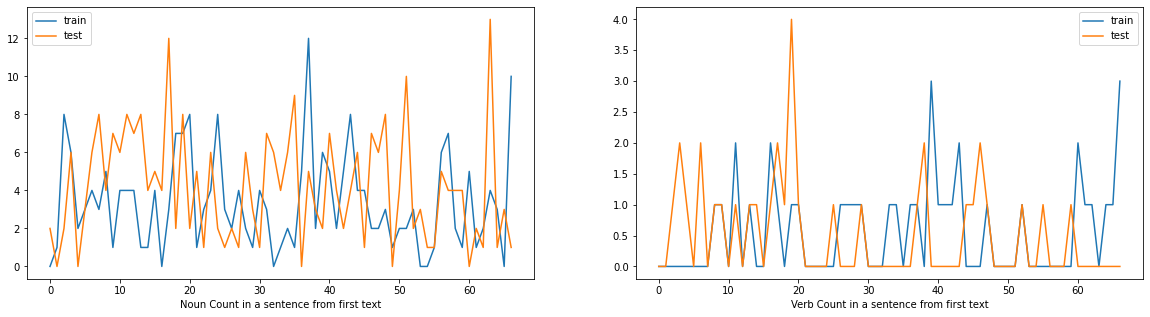

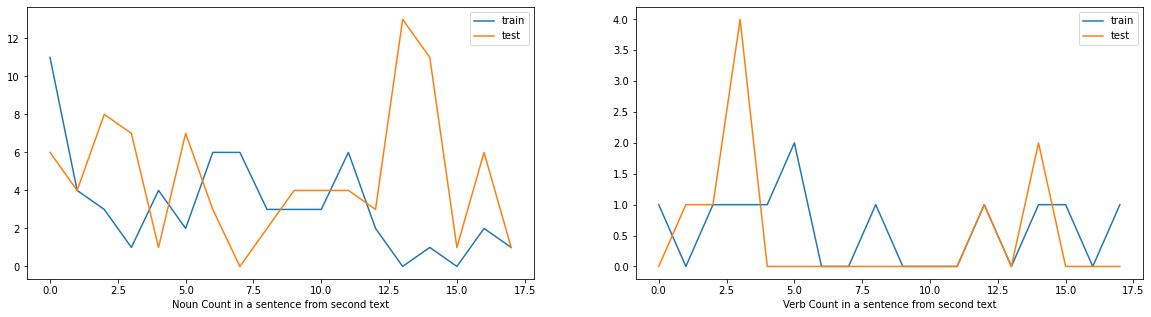

In [14]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


def calc_nouncountl(listv):   
    x = []
    for i in listv['nounl']:
        x.append(len(i))      
    return x

def calc_verbcountl(listv):   
    x = []
    for i in listv['verbl']:
        x.append(len(i))      
    return x




######### First text

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(calc_nouncountl(train_first),label = "train")
plt.plot(calc_nouncountl(test_first),label = "test")
plt.xlabel("Noun Count in a sentence from first text")
plt.legend()

plt.subplot(1,2,2)
plt.plot(calc_verbcountl(train_first),label = "train")
plt.plot(calc_verbcountl(test_first),label = "test")
plt.xlabel("Verb Count in a sentence from first text")
plt.legend()

############ second text

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(calc_nouncountl(train_second),label = "train")
plt.plot(calc_nouncountl(test_second),label = "test")
plt.xlabel("Noun Count in a sentence from second text")
plt.legend()

plt.subplot(1,2,2)
plt.plot(calc_verbcountl(train_second),label = 'train')
plt.plot(calc_verbcountl(test_second),label = 'test')
plt.xlabel("Verb Count in a sentence from second text")
plt.legend()



# Checking sentence and grammer

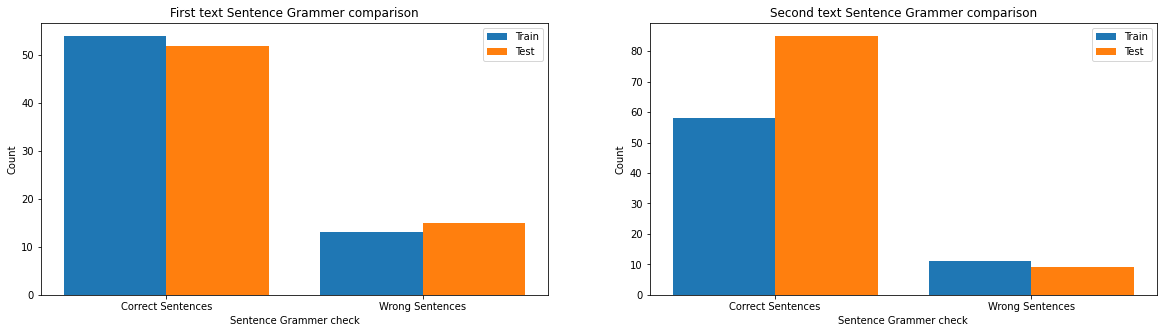

In [15]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data


def calc_grammer(listv):   
    total_c = 0
    total_w = 0
    for i in listv['grammerl']:
        if i == 0:
            total_c = total_c + 1  
        else:
            total_w = total_w + 1  
    return total_c,total_w

X = ['Correct Sentences','Wrong Sentences']
X_axis = np.arange(len(X))

plt.figure(figsize=(20,5))

  
plt.subplot(1,2,1)  

[ftrain_correct,ftrain_wrong] = calc_grammer(train_first)
[ftest_correct,ftest_wrong] = calc_grammer(test_first)

Y_first = [ftrain_correct,ftrain_wrong]
Z_first = [ftest_correct,ftest_wrong]

plt.bar(X_axis - 0.2, Y_first, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Z_first, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Sentence Grammer check")
plt.ylabel("Count")
plt.title("First text Sentence Grammer comparison")
plt.legend()



plt.subplot(1,2,2)  

[ftrain_correct,ftrain_wrong] = calc_grammer(train_second)
[ftest_correct,ftest_wrong] = calc_grammer(test_second)

Y_first = [ftrain_correct,ftrain_wrong]
Z_first = [ftest_correct,ftest_wrong]

plt.bar(X_axis - 0.2, Y_second, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Z_second, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Sentence Grammer check")
plt.ylabel("Count")
plt.title("Second text Sentence Grammer comparison")
plt.legend()

plt.show()

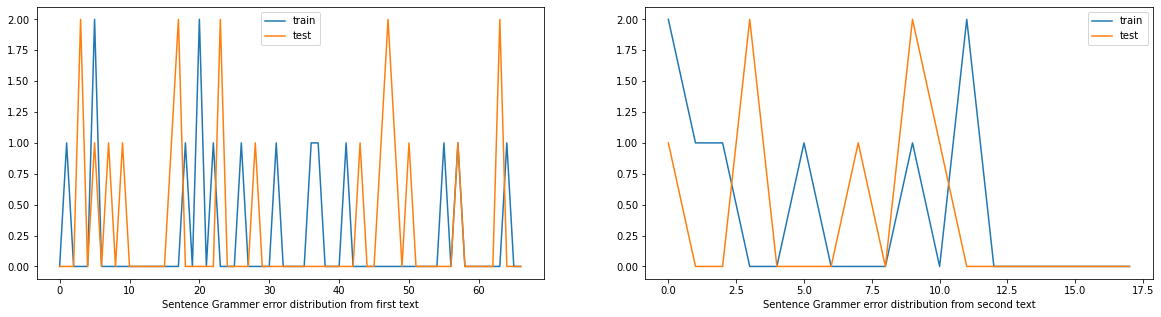

In [16]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


def calc_grammerl(listv):   
    x = []    
    for i in listv['grammerl']:
        #print(i)
        x.append(i)
    return x


ftrain = calc_grammerl(train_first)
ftest = calc_grammerl(test_first)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ftrain,label = "train")
plt.plot(ftest,label = "test")
plt.xlabel("Sentence Grammer error distribution from first text")
plt.legend()

ftrain = calc_grammerl(train_second)
ftest = calc_grammerl(test_second)

plt.subplot(1,2,2)
plt.plot(ftrain,label = "train")
plt.plot(ftest,label = "test")
plt.xlabel("Sentence Grammer error distribution from second text")
plt.legend()




# Thanking emotion Sentence style comparison 

In [19]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize

#sentence1 = word_tokenize("I want to thank you from the bottom of my heart, and also say that time has flown by rather quickly, but the memories you have left with me will always be with me forever and ever, especially 'Sachin, Sachin' which will reverberate in my ears till I stop breathing")
#sentence2 = word_tokenize("To all my past captains, to Sri Lanka Cricket, to all my team-mates, thank you very much for everything that you've done for me")
#print(len(train_thanking_first))
#print(len(test_thanking_first))

#print(len(test_thanking_second))
#print(len(test_thanking_second))


def calc_comparison(review_tokens,df1,df2):

    review_dict = pd.DataFrame()

    for i in range(min(len(df1),len(df2))):
        sentence1 = word_tokenize(df1['emotion_text'].iloc[i])
        sentence2 = word_tokenize(df2['emotion_text'].iloc[i])       
        
        review_tokens = set(review_tokens).union(set(set(sentence1).union(set(sentence2))))   
        
    diffr = 0    
    df_update = df1
    
    if len(df1) > len(df2):        
        df_update = df1
        diffr = len(df2)
    else:       
        diffr = len(df1)
        df_update = df2
        
    for i in range(diffr, len(df_update)):    
        
        sentence3 = word_tokenize(df_update['emotion_text'].iloc[i])
        review_tokens = set(review_tokens).union(set(sentence3))

    #review_tokens

    review_dict = pd.DataFrame()

    for i in range(min(len(df1),len(df2))):

        review1_dict = dict.fromkeys(review_tokens,0)
        review2_dict = dict.fromkeys(review_tokens,0)

        sentence1 = word_tokenize(df1['emotion_text'].iloc[i])
        sentence2 = word_tokenize(df2['emotion_text'].iloc[i])

        for token in sentence1:
            review1_dict[token]+=1

        for token in sentence2:
            review2_dict[token]+=1  

        review1 = pd.DataFrame([review1_dict])
        review2 = pd.DataFrame([review2_dict])

        review_dict = pd.concat([review_dict, review1])
        review_dict = pd.concat([review_dict, review2])
        
    
            
    
    
    for j in range(diffr, len(df_update)):
        
            review3_dict = dict.fromkeys(review_tokens,0)   
            
            sentence3 = word_tokenize(df_update['emotion_text'].iloc[j])
            for token in sentence3:
                review3_dict[token] += 1
            
            review3 = pd.DataFrame([review3_dict]) 
            review_dict = pd.concat([review_dict, review3]) 
    return review_dict
   




In [20]:
review_tokens = {}
review_dict = calc_comparison(review_tokens,train_thanking_first,train_thanking_second)
review_dict.head()


,here,wishers,between,people,believe,out,think,today,everything,'ve,...,are,Suthami,like,it,one,Minister,Before,being,role,many
0,0,0,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
0,2,1,0,1,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
review_tokens = {}
review_dict = calc_comparison(review_tokens,test_thanking_first,test_thanking_second)
review_dict.head()

,other,duties,wonderfully,Sachin,here,put,support,again,people,him,...,very,try,keeping,this,a,at,like,it,bottom,stop
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
